# Essa empresa precisa acompanhar a saúde da plataforma periodicamente. Quais três métricas você julgaria mais importantes para acompanhamento?

    O acompanhamento periódico de métricas é muito importante para estar sempre ciente da situação em que está a saúde da plataforma. Dentre as diversas métricas existentes e interessantes que se pode registrar, a receita seria a mais importante, pois ela mostra o quanto rentável está sendo manter a plataforma, além de ser o principal indicador de desempenho. 
    Uma segunda métrica muito relevante é o número de visitantes. A partir dela podemos saber se a plataforma tem tido bastante acesso, isso pode ajudar a descobrir um possível problema visto em outra métrica, como uma queda de receita que tenha seguido números baixos de visitantes pode significar que a plataforma está perdendo clientes por não ter tido novos visitantes e assim não estar ajudando nas vendas. Outro motivo para importância dessa métrica é que o número de visitantes ajuda a cotar o preço de publicidade e dos produtos a serem vendidos aos vendedores do site.
    Outra métrica importante é a de anúncios aprovados. Com ela podemos perceber uma possivel queda em visitas por falta de produtos novos, além da sua ligação com os vendedores do site, de forma a ter conexão também com a receita. 

# A partir de Setembro/2019, houve uma queda na receita de produtos digitais da empresa. Um engenheiro extraiu para você os dados apresentados na aba "Dados analíticos", que envolvem algumas dimensões e métricas da empresa no período de Janeiro/2018 a Setembro/2019. A aba "Dicionário dados analíticos" contém a descrição da planilha. Com base nesses dados, responda: o que causou a queda?

Tendo o arquivo "Copy of Case -Vaga de Dados -Estagiário.xlsx" que contém os dados de janeiro de 2018 a setembro de 2019 em formato .xlsx, foi escolhida a linguagem de programação Python para manipular e analisar o arquivo. Será feito o uso das bibliotecas pandas e matplotlib para auxiliar. 

In [1]:
#Biblioteca 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Após algumas análises foi visto que parte do código se repetia muito (o que poluía o trabalho e possibilitava mais erros, como os de digitação). Por esse motivo, criamos as funções abaixo.

In [2]:
#Legendas de Região
def legendas():
    red_patch = mpatches.Patch(color='red', label='Norte')
    blue_patch = mpatches.Patch(color='blue', label='Nordeste')
    green_patch = mpatches.Patch(color='green', label='Sul')
    purple_patch = mpatches.Patch(color='purple', label='Centro-Oeste')
    plt.legend(handles=[blue_patch,green_patch,purple_patch,red_patch])

In [3]:
#Função que faz os agrupamentos com somatório de visitantes, receita, anuncios aprovados e anunciantes.
#Entrada data= uma tabela, tipo= coluna a ser agrupada.
#Retorna quatro vetores com suas separações e somas realizadas.
def Agrupa(data,tipo):
    visita=data.groupby([tipo]).Visitantes.sum()
    receita=data.groupby([tipo]).Receita.sum()
    anunAp=data.groupby([tipo]).AnunciosAp.sum()
    anunciantes=data.groupby([tipo]).Anunciantes.sum()
    return visita, receita, anunAp, anunciantes

In [4]:
#Plote simples de quatro graficos cujos dados vêm na entrada da função.
def graf4(vis,rec,anA,anu):
    plt.figure(1)
    plt.figure(figsize=(16,8))

    plt.subplot(2,2,1)
    plt.title('Visita Mensal')
    plt.plot(vis)

    plt.subplot(2,2,2)
    plt.title('Receita Mensal')
    plt.plot(rec,color='red')

    plt.subplot(2,2,3)
    plt.title('Anúncios Aprovados Mensal')
    plt.plot(anA, color='green')

    plt.subplot(2,2,4)
    plt.title('Anunciantes Mensal')
    plt.plot(anu, color='gray')

    plt.tight_layout()

A seguir será lido o arquivo de Excel com o uso de uma função da biblioteca pandas, muito usada para a análise de dados. É muito importante que o rquivo seja verificado antes de começar qualquer análise para garantir a integridade e a limpeza dos dados, com o objetivo de obter informações mais precisas.

In [5]:
#Leitura e Visualização dos dados fornecidos.
dataset = pd.read_excel("Copy of Case -Vaga de Dados -Estagiário.xlsx")
dataset.head()

,Mês,Plataforma,Vertical,Região,Usuário,Visitantes,Anunciantes,Anúncios aprovados,Receita
0,2018-01-01,App,Auto,Centro-Oeste,private,988282,45798,54396,40847.487611
1,2018-01-01,App,Auto,Centro-Oeste,professional,5882,1008,5944,206369.858626
2,2018-01-01,App,Auto,Nordeste,private,2474397,80125,94709,68830.121881
3,2018-01-01,App,Auto,Nordeste,professional,9861,2027,14849,319140.258446
4,2018-01-01,App,Auto,Norte,private,999385,33142,42596,31956.023799



#### Limpeza e integridade

A primeira parte de limpeza foi a verificação de nulos e descrição das colunas

In [6]:
#Modificando título das colunas para não gerar possíveis problemas com espaços e acentos.
dataset.shape
dataset.columns=['Mes','Plataforma','Vertical','Regiao','Usuario','Visitantes','Anunciantes','AnunciosAp','Receita']

In [7]:
#Mostra verificação de nulos e descrição da tabela por coluna.
for coluna in dataset.columns:  #Pega um título de coluna da tabela por vez.
    print("\n\n\n---------------", coluna,"---------------")
    print("\nNúmero de valores nulos:\n", dataset[coluna].isnull().sum()) #verifica se é nulo o valor e soma caso verídico.
    print("Descrição:\n",dataset[coluna].describe())  #Apresenta descrição das colunas.
#Apresenta quantidade de dados, número de dados únicos, a saída mais frequente e sua frequência,além de dados estatisticos quando os dados são números.




--------------- Mes ---------------

Número de valores nulos:
 0
Descrição:
 count                    1890
unique                     21
top       2019-07-01 00:00:00
freq                       90
first     2018-01-01 00:00:00
last      2019-09-01 00:00:00
Name: Mes, dtype: object



--------------- Plataforma ---------------

Número de valores nulos:
 0
Descrição:
 count     1890
unique       3
top        Web
freq       630
Name: Plataforma, dtype: object



--------------- Vertical ---------------

Número de valores nulos:
 0
Descrição:
 count     1890
unique       3
top       Auto
freq       630
Name: Vertical, dtype: object



--------------- Regiao ---------------

Número de valores nulos:
 0
Descrição:
 count     1890
unique       5
top        Sul
freq       378
Name: Regiao, dtype: object



--------------- Usuario ---------------

Número de valores nulos:
 0
Descrição:
 count        1890
unique          2
top       private
freq          945
Name: Usuario, dtype: object



--

* Observação por grupos das colunas 

In [8]:
#Ajuda a conferir se teve erro de digitação nos nomes, além de possibilitar uma análise de distribuição por coluna.
dataset.groupby(['Plataforma']).size()

Plataforma
App       630
M Site    630
Web       630
dtype: int64

In [9]:
dataset.groupby(['Vertical']).size()

Vertical
Auto           630
Marketplace    630
Real Estate    630
dtype: int64

In [10]:
#Trocar o nome Real Estate para RealEstate de forma que não haja problemas depois na manipulação.
dataset.loc[dataset['Vertical']=='Real Estate','Vertical']="RealEstate"
dataset.groupby(['Vertical']).size()

Vertical
Auto           630
Marketplace    630
RealEstate     630
dtype: int64

In [11]:
dataset.groupby(['Regiao']).size()

Regiao
Centro-Oeste    378
Nordeste        378
Norte           378
Sudeste         378
Sul             378
dtype: int64

In [12]:
#Trocar o nome Centro-Oeste para CentroOeste para evitar problemas com o hífen.
dataset.loc[dataset['Regiao']=='Centro-Oeste','Regiao']="CentroOeste"
dataset.groupby(['Regiao']).size()

Regiao
CentroOeste    378
Nordeste       378
Norte          378
Sudeste        378
Sul            378
dtype: int64

In [13]:
dataset.groupby(['Usuario']).size()

Usuario
private         945
professional    945
dtype: int64

Podemos observar que não há valores nulos, que não há divergência nas palavras utilizadas para categorizar as colunas. Também não há valores impossíveis, como número de visitantes ou anúncios aprovados negativos.
Com a função groupby foi reparado que a quantidade de categorias diferentes tem sempre os mesmos valores de dados. 

A seguir daremos início às análises focadas nos valores e também a gerar gráficos para nos ajudar a visualizar. A primeira análise será feita dos dados "grossos", sem restrição, apenas juntando por mês.

# Análise e gráficos

<Figure size 432x288 with 0 Axes>

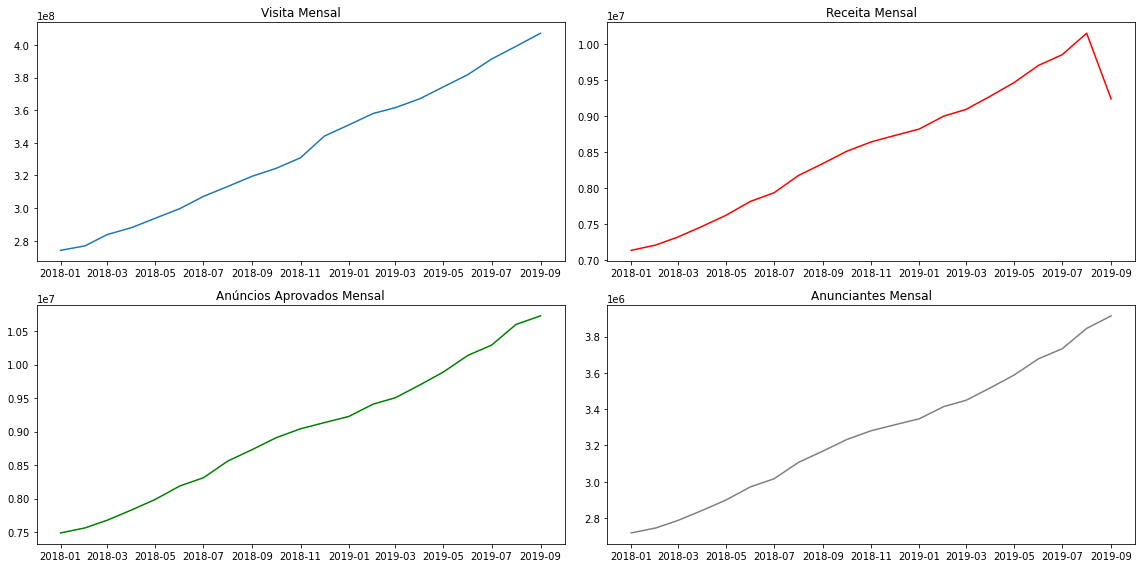

In [14]:
#Análises de dados agrupadas por mês.
(VisitaMensalSul,ReceitaMensalSul, 
AnunApMensalSul,AnunciantesMensalSul)=Agrupa(dataset,'Mes')

#Gráfico:
graf4(VisitaMensalSul,ReceitaMensalSul,AnunApMensalSul,AnunciantesMensalSul)

#Relação de Mensal x Vertical x Região x Plataforma x Usuário é igualmente distribuída nos meses.

Podemos de fato reparar na queda situada em setembro de 2019 referente a renda, e olhando os outros dados, podemos reparar que não houve nenhuma outra queda para justificar diretamente.

Para tentar entender melhor essa queda na receita, analisaremos primeiro a influência de cada categoria das dimensões que temos em mãos. 

<Figure size 432x288 with 0 Axes>

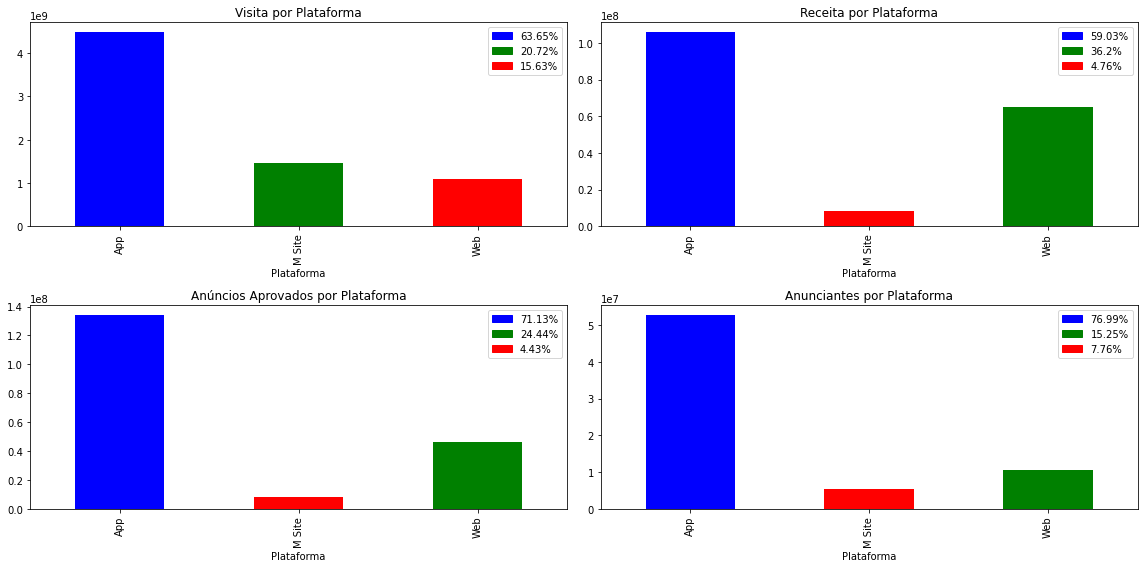

In [15]:
#Análises agrupadas por Plataforma
(VisitaPlat,ReceitaPlat, 
 AnunApPlat, AnunciantesPlat)=Agrupa(dataset,'Plataforma')

plt.figure(1)
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.title('Visita por Plataforma')
VisitaPlat.plot.bar(color=['blue','green','red'])
#legenda
blue_patch = mpatches.Patch(color='blue',
    label= str(round(VisitaPlat.App/VisitaPlat.sum()*100,2))+ '%')
red_patch = mpatches.Patch(color='red',
    label=str(round(VisitaPlat.Web/VisitaPlat.sum()*100,2))+'%' )
green_patch = mpatches.Patch(color='green',
    label=str(round(VisitaPlat[1]/VisitaPlat.sum()*100,2))+'%')
plt.legend(handles=[blue_patch,green_patch,red_patch])


plt.subplot(2,2,2)
plt.title('Receita por Plataforma')
ReceitaPlat.plot.bar(color=['blue','red','green'])
#legenda
blue_patch = mpatches.Patch(color='blue',
    label= str(round(ReceitaPlat.App/ReceitaPlat.sum()*100,2))+ '%')
red_patch = mpatches.Patch(color='red',
    label=str(round(ReceitaPlat[1]/ReceitaPlat.sum()*100,2))+'%' )
green_patch = mpatches.Patch(color='green',
    label=str(round(ReceitaPlat.Web/ReceitaPlat.sum()*100,2))+'%')
plt.legend(handles=[blue_patch,green_patch,red_patch])

plt.subplot(2,2,3)
plt.title('Anúncios Aprovados por Plataforma')
AnunApPlat.plot.bar(color=['blue','red','green'])
#legenda
blue_patch = mpatches.Patch(color='blue',
    label= str(round(AnunApPlat.App/AnunApPlat.sum()*100,2))+ '%')
red_patch = mpatches.Patch(color='red',
    label=str(round(AnunApPlat[1]/AnunApPlat.sum()*100,2))+'%' )
green_patch = mpatches.Patch(color='green',
    label=str(round(AnunApPlat.Web/AnunApPlat.sum()*100,2))+'%')
plt.legend(handles=[blue_patch,green_patch,red_patch])


plt.subplot(2,2,4)
plt.title('Anunciantes por Plataforma')
AnunciantesPlat.plot.bar(color=['blue','red','green'])
#legenda
blue_patch = mpatches.Patch(color='blue',
    label= str(round(AnunciantesPlat.App/AnunciantesPlat.sum()*100,2))+ '%')
red_patch = mpatches.Patch(color='red',
    label=str(round(AnunciantesPlat[1]/AnunciantesPlat.sum()*100,2))+'%' )
green_patch = mpatches.Patch(color='green',
    label=str(round(AnunciantesPlat.Web/AnunciantesPlat.sum()*100,2))+'%')
plt.legend(handles=[blue_patch,green_patch,red_patch])


plt.tight_layout()






Podemos ver que o App domina em todas três métricas, sendo responsável pela maioria das visitações, mais de 70% dos anúncios aprovados, quase 77% dos anunciantes e 59,03% da receita das plataformas. Enquanto isso M Site fica com os menores números em todos os quesitos exeto nas visitas. A Web é responsável por mais de um terço da receita.

A próxima dimensão a ser analisada é a Vertical.

prof: 0.49594972140497645


<Figure size 432x288 with 0 Axes>

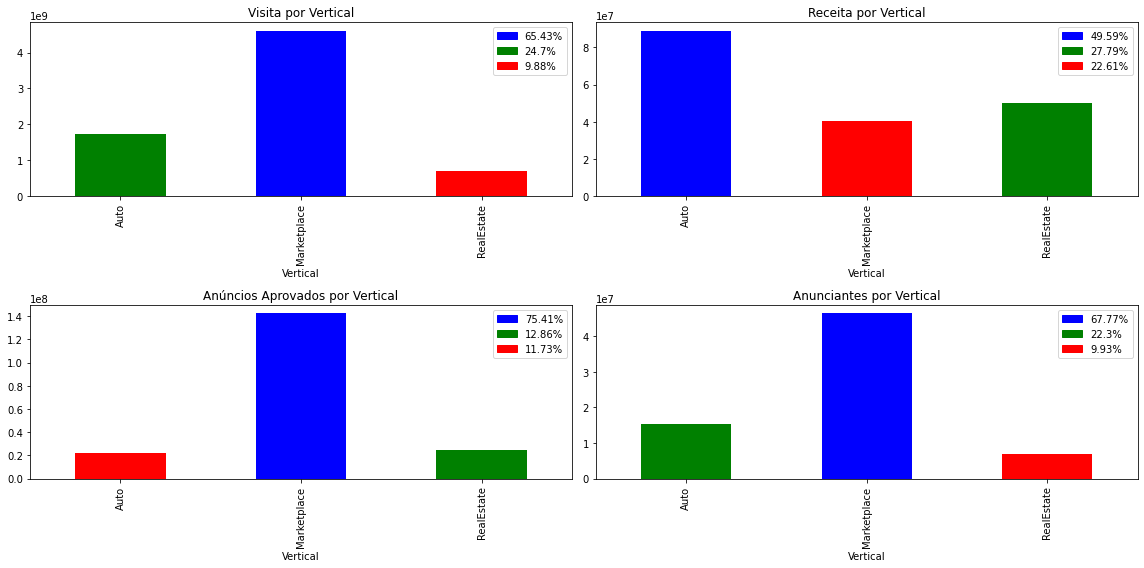

In [16]:
#Análises agrupadas por Vertical
(VisitaVertical,ReceitaVertical, 
AnunApVertical, AnunciantesVertical)=Agrupa(dataset,'Vertical')  

plt.figure(1)
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.title('Visita por Vertical')
VisitaVertical.plot.bar(color=['green', 'blue', 'red'])
#legenda
blue_patch = mpatches.Patch(color='blue',
    label= str(round(VisitaVertical.Marketplace/VisitaVertical.sum()*100,2))+ '%')
red_patch = mpatches.Patch(color='red',
    label=str(round(VisitaVertical.RealEstate/VisitaVertical.sum()*100,2))+'%' )
green_patch = mpatches.Patch(color='green',
    label=str(round(VisitaVertical.Auto/VisitaVertical.sum()*100,2))+'%')
plt.legend(handles=[blue_patch,green_patch,red_patch])

plt.subplot(2,2,2)
plt.title('Receita por Vertical')
ReceitaVertical.plot.bar(color=['blue','red','green'])
#legenda
blue_patch = mpatches.Patch(color='blue',
    label=str(round(ReceitaVertical.Auto/ReceitaVertical.sum()*100,2))+'%' )
red_patch = mpatches.Patch(color='red',
    label= str(round(ReceitaVertical.Marketplace/ReceitaVertical.sum()*100,2))+'%')
green_patch = mpatches.Patch(color='green',
    label=str(round(ReceitaVertical.RealEstate/ReceitaVertical.sum()*100,2))+ '%')
plt.legend(handles=[blue_patch,green_patch,red_patch])

plt.subplot(2,2,3)
plt.title('Anúncios Aprovados por Vertical')
AnunApVertical.plot.bar(color=['red', 'blue', 'green'])
#legenda
blue_patch = mpatches.Patch(color='blue',
    label= str(round(AnunApVertical.Marketplace/AnunApVertical.sum()*100,2))+ '%')
red_patch = mpatches.Patch(color='red',
    label=str(round(AnunApVertical.Auto/AnunApVertical.sum()*100,2))+'%' )
green_patch = mpatches.Patch(color='green',
    label=str(round(AnunApVertical.RealEstate/AnunApVertical.sum()*100,2))+'%')
plt.legend(handles=[blue_patch,green_patch,red_patch])

plt.subplot(2,2,4)
plt.title('Anunciantes por Vertical')
AnunciantesVertical.plot.bar(color=['green', 'blue', 'red'])
#legendas
blue_patch = mpatches.Patch(color='blue',
    label= str(round(AnunciantesVertical.Marketplace/AnunciantesVertical.sum()*100,2))+ '%')
red_patch = mpatches.Patch(color='red',
    label=str(round(AnunciantesVertical.RealEstate/AnunciantesVertical.sum()*100,2))+'%' )
green_patch = mpatches.Patch(color='green',
    label=str(round(AnunciantesVertical.Auto/AnunciantesVertical.sum()*100,2))+'%')
plt.legend(handles=[blue_patch,green_patch,red_patch])

plt.tight_layout()

print("prof:" , ReceitaVertical.Auto/ReceitaVertical.sum())

Na análise da Vertical podemos ver que Marketplace ocupa quase sempre mais que 65% enquanto as outras duas categorias não chegam nem a 25%. Porém, na receita é Auto que se destaca sendo responsável por quase 50% dela enquanto Real Estate e Marketplace têm, respectivamente 27,79% e 22,61%.

A terceira dimensão a ser observada é o Usuário.

<Figure size 432x288 with 0 Axes>

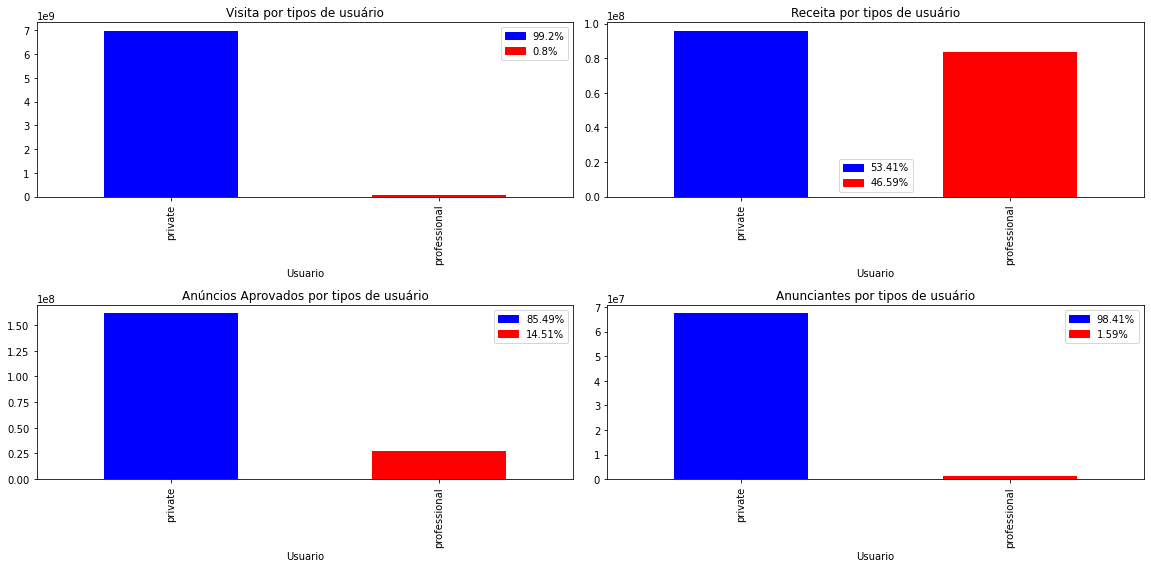

In [17]:
#Análises agrupadas por Usuário
(VisitaUsuario,ReceitaUsuario, 
AnunApUsuario, AnunciantesUsuario)=Agrupa(dataset,'Usuario') 

#Gráfico
plt.figure(1)
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.title('Visita por tipos de usuário')
VisitaUsuario.plot.bar(color=[ 'blue', 'red'])
#legendas
blue_patch = mpatches.Patch(color='blue',
    label= str(round(VisitaUsuario.private/VisitaUsuario.sum()*100,2))+ '%')
red_patch = mpatches.Patch(color='red',
    label=str(round(VisitaUsuario.professional/VisitaUsuario.sum()*100,2))+'%' )
plt.legend(handles=[blue_patch,red_patch])


plt.subplot(2,2,2)
plt.title('Receita por tipos de usuário')
ReceitaUsuario.plot.bar(color=[ 'blue', 'red'])
#legendas
blue_patch = mpatches.Patch(color='blue',
    label= str(round(ReceitaUsuario.private/ReceitaUsuario.sum()*100,2))+ '%')
red_patch = mpatches.Patch(color='red',
    label=str(round(ReceitaUsuario.professional/ReceitaUsuario.sum()*100,2))+'%' )
plt.legend(handles=[blue_patch,red_patch])


plt.subplot(2,2,3)
plt.title('Anúncios Aprovados por tipos de usuário')
AnunApUsuario.plot.bar(color=[ 'blue', 'red'])
#legendas
blue_patch = mpatches.Patch(color='blue',
    label= str(round(AnunApUsuario.private/AnunApUsuario.sum()*100,2))+ '%')
red_patch = mpatches.Patch(color='red',
    label=str(round(AnunApUsuario.professional/AnunApUsuario.sum()*100,2))+'%' )
plt.legend(handles=[blue_patch,red_patch])

plt.subplot(2,2,4)
plt.title('Anunciantes por tipos de usuário')
AnunciantesUsuario.plot.bar(color=[ 'blue', 'red'])
#legendas
blue_patch = mpatches.Patch(color='blue',
    label= str(round(AnunciantesUsuario.private/AnunciantesUsuario.sum()*100,2))+ '%')
red_patch = mpatches.Patch(color='red',
    label=str(round(AnunciantesUsuario.professional/AnunciantesUsuario.sum()*100,2))+'%' )
plt.legend(handles=[blue_patch,red_patch])

plt.tight_layout()

Na divisão entre usuários Private e Professional notamos que Private tem muito mais peso em visitas, anúncios aprovados e anunciantes, porém é responsável por pouco mais de 50% da receita apenas. Deixando 46,59% da receita fruto dos usuários Professional.

Por último faremos esse mesmo tipo de comparação utilizando as regiões como diferença.

Regiao
CentroOeste     7303404
Nordeste       14132031
Norte           6697939
Sudeste        30226085
Sul            10207293
Name: Anunciantes, dtype: int64 
 prof: 0.4906280412821413


<Figure size 432x288 with 0 Axes>

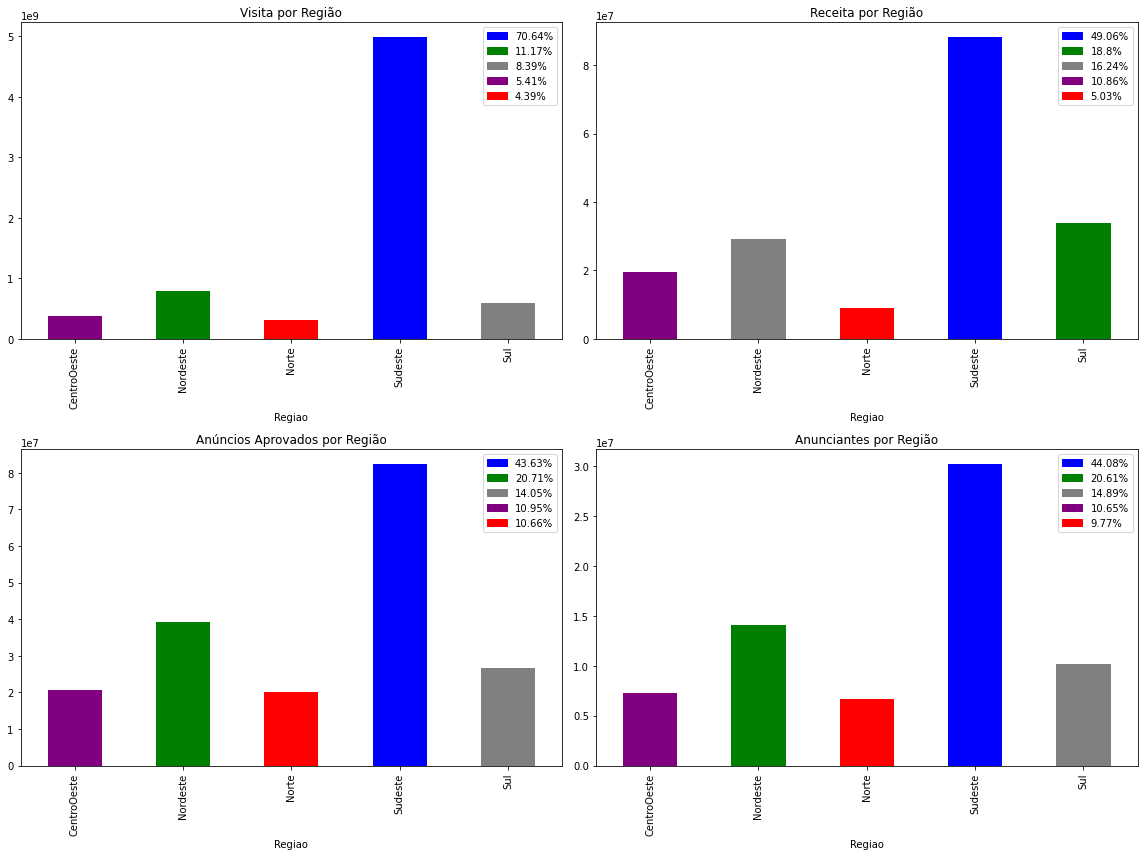

In [18]:
#Análises agrupadas por região
(VisitaRegiao,ReceitaRegiao, 
AnunApRegiao, AnunciantesRegiao)=Agrupa(dataset, 'Regiao')  


#Gráficos:
plt.figure(1)
plt.figure(figsize=(16,12))


plt.subplot(2,2,1)
plt.title('Visita por Região')
VisitaRegiao.plot.bar(color=['purple','green','red', 'blue','gray'])
#legenda
red_patch = mpatches.Patch(color='red',
                           label=str(round(VisitaRegiao.Norte/VisitaRegiao.sum()*100,2))+ '%')
blue_patch = mpatches.Patch(color='blue',
                            label=str(round(VisitaRegiao.Sudeste/VisitaRegiao.sum()*100,2))+ '%')
purple_patch = mpatches.Patch(color='purple',
                            label=str(round(VisitaRegiao.CentroOeste/VisitaRegiao.sum()*100,2))+ '%')
green_patch = mpatches.Patch(color='green',
                            label=str(round(VisitaRegiao.Nordeste/VisitaRegiao.sum()*100,2))+ '%')
gray_patch = mpatches.Patch(color='gray',
                            label=str(round(VisitaRegiao.Sul/VisitaRegiao.sum()*100,2))+ '%')
plt.legend(handles=[blue_patch,green_patch,gray_patch,purple_patch,red_patch])


plt.subplot(2,2,2)
plt.title('Receita por Região')
ReceitaRegiao.plot.bar(color=['purple','gray','red', 'blue','green'])
#legenda
red_patch = mpatches.Patch(color='red',
                           label=str(round(ReceitaRegiao.Norte/ReceitaRegiao.sum()*100,2))+ '%')
blue_patch = mpatches.Patch(color='blue',
                            label=str(round(ReceitaRegiao.Sudeste/ReceitaRegiao.sum()*100,2))+ '%')
purple_patch = mpatches.Patch(color='purple',
                            label=str(round(ReceitaRegiao.CentroOeste/ReceitaRegiao.sum()*100,2))+ '%')
green_patch = mpatches.Patch(color='green',
                            label=str(round(ReceitaRegiao.Sul/ReceitaRegiao.sum()*100,2))+ '%')
gray_patch = mpatches.Patch(color='gray',
                            label=str(round(ReceitaRegiao.Nordeste/ReceitaRegiao.sum()*100,2))+ '%')
plt.legend(handles=[blue_patch,green_patch,gray_patch,purple_patch,red_patch])


plt.subplot(2,2,3)
plt.title('Anúncios Aprovados por Região')
AnunApRegiao.plot.bar(color=['purple','green','red', 'blue','gray'])
#legenda
red_patch = mpatches.Patch(color='red',
                           label=str(round(AnunApRegiao.Norte/AnunApRegiao.sum()*100,2))+ '%')
blue_patch = mpatches.Patch(color='blue',
                            label=str(round(AnunApRegiao.Sudeste/AnunApRegiao.sum()*100,2))+ '%')
purple_patch = mpatches.Patch(color='purple',
                            label=str(round(AnunApRegiao.CentroOeste/AnunApRegiao.sum()*100,2))+ '%')
green_patch = mpatches.Patch(color='green',
                            label=str(round(AnunApRegiao.Nordeste/AnunApRegiao.sum()*100,2))+ '%')
gray_patch = mpatches.Patch(color='gray',
                            label=str(round(AnunApRegiao.Sul/AnunApRegiao.sum()*100,2))+ '%')
plt.legend(handles=[blue_patch,green_patch,gray_patch,purple_patch,red_patch])


plt.subplot(2,2,4)
plt.title('Anunciantes por Região')
AnunciantesRegiao.plot.bar(color=['purple','green','red', 'blue','gray'])
#legenda
red_patch = mpatches.Patch(color='red',
                           label=str(round(AnunciantesRegiao.Norte/AnunciantesRegiao.sum()*100,2))+ '%')
blue_patch = mpatches.Patch(color='blue',
                            label=str(round(AnunciantesRegiao.Sudeste/AnunciantesRegiao.sum()*100,2))+ '%')
purple_patch = mpatches.Patch(color='purple',
                            label=str(round(AnunciantesRegiao.CentroOeste/AnunciantesRegiao.sum()*100,2))+ '%')
green_patch = mpatches.Patch(color='green',
                            label=str(round(AnunciantesRegiao.Nordeste/AnunciantesRegiao.sum()*100,2))+ '%')
gray_patch = mpatches.Patch(color='gray',
                            label=str(round(AnunciantesRegiao.Sul/AnunciantesRegiao.sum()*100,2))+ '%')
plt.legend(handles=[blue_patch,green_patch,gray_patch,purple_patch,red_patch])



plt.tight_layout()
print(AnunciantesRegiao, "\n prof:" , ReceitaRegiao.Sudeste/ReceitaRegiao.sum())

Nas análises por região podemos ver que Sudeste tem mais que o dobro das outras regiões, sendo acima de 40% em todas as métricas, sendo 49,06% da receita e 70,64% das visitas. As regiões Centro-Oeste e Norte são as de menores números.

Como foi vista uma diferença tão grande nas regiões, iremos agora analisar os dados separados por mês de cada região.

#### Análise de regiões

In [19]:
#Separando a base agrupando por região
dsR=dataset.groupby('Regiao')

In [20]:
# Dataset apenas da área Norte
dNort=dsR.get_group('Norte')
#Analises agrupadas por mês
(VisitaMensalNorte, ReceitaMensalNorte,
AnunApMensalNorte, AnunciantesMensalNorte)=Agrupa(dNort,'Mes')

# Dataset apenas da área Centro-Oeste
dCenOe=dsR.get_group('CentroOeste')
#Analises agrupadas por mês
(VisitaMensalCO,ReceitaMensalCO, 
AnunApMensalCO,AnunciantesMensalCO)=Agrupa(dCenOe,'Mes') 

# Dataset apenas da área Nordeste
dNord=dsR.get_group('Nordeste')
#Analises agrupadas por mês
(VisitaMensalNordeste,ReceitaMensalNordeste,
AnunApMensalNordeste,AnunciantesMensalNordeste)=Agrupa(dNord,'Mes')  

# Dataset apenas da área Sul
dSul=dsR.get_group('Sul')
#Analises agrupadas por mês
(VisitaMensalSul,ReceitaMensalSul, 
AnunApMensalSul,AnunciantesMensalSul)=Agrupa(dSul,'Mes')  

# Dataset apenas da área Sudeste
dSud=dsR.get_group('Sudeste')
#Analises agrupadas por mês
(VisitaMensalSudeste, ReceitaMensalSudeste,  
AnunApMensalSudeste, AnunciantesMensalSudeste)=Agrupa(dSud,'Mes')  

<Figure size 432x288 with 0 Axes>

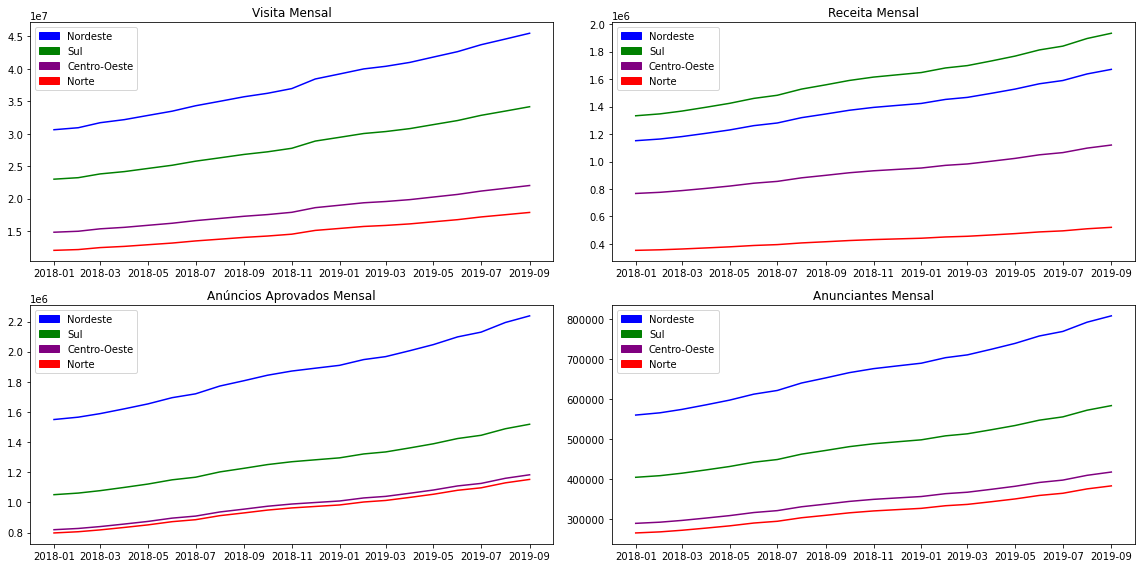

In [21]:
#Gráficos:
plt.figure(1)
plt.figure(figsize=(16,8))

red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

plt.subplot(2,2,1)
plt.title('Visita Mensal')
plt.plot(VisitaMensalSul,color='green')
plt.plot(VisitaMensalNordeste,color='blue')
plt.plot(VisitaMensalCO, color='purple')
plt.plot(VisitaMensalNorte, color='red')
legendas()


plt.subplot(2,2,2)
plt.title('Receita Mensal')
plt.plot(ReceitaMensalSul,color='green')
plt.plot(ReceitaMensalNordeste,color='blue')
plt.plot(ReceitaMensalCO,color='purple')
plt.plot(ReceitaMensalNorte,color='red')
legendas()


plt.subplot(2,2,3)
plt.title('Anúncios Aprovados Mensal')
plt.plot(AnunApMensalSul, color='green')
plt.plot(AnunApMensalNordeste, color='blue')
plt.plot(AnunApMensalCO, color='purple')
plt.plot(AnunApMensalNorte, color='red')
legendas()


plt.subplot(2,2,4)
plt.title('Anunciantes Mensal')
plt.plot(AnunciantesMensalSul, color='green')
plt.plot(AnunciantesMensalNordeste, color='blue')
plt.plot(AnunciantesMensalCO, color='purple')
plt.plot(AnunciantesMensalNorte, color='red')
legendas()


plt.tight_layout()

Como as regiões Nordeste, Sul, Norte e Centro-Oeste são de grandezas parecidas,nós a colocamos na mesma área de gráfico para assim poder compará-las. Com esses dados podemos ver que as curvas são similares porém em escalas diferentes, a tendência e tremulações costumam ser comuns nas quatro regiões, o que pode tanto dizer que foi um problema geral da plataforma como também pode ter sido fatores externos como época do ano ou problemas econômicos do Brasil. Precisaríamos de mais dados para poder descobriro motivo. A região Sul é a que mantém maior receita entre elas, enquanto a Norte é a de menor com grandes diferenças para a terceira colocada. É legal reparar que esse distanciamento grande entre elas não é visto em anúncios aprovados. 

A nossa principal visão aqui é ver que na receita de nenhuma dessas regiões teve queda, o que nos leva a crer que toda a queda de setembro foi localizada na região Sudeste. A análise a seguir provará isso.

Queda receita sudeste: -20.28 %


<Figure size 432x288 with 0 Axes>

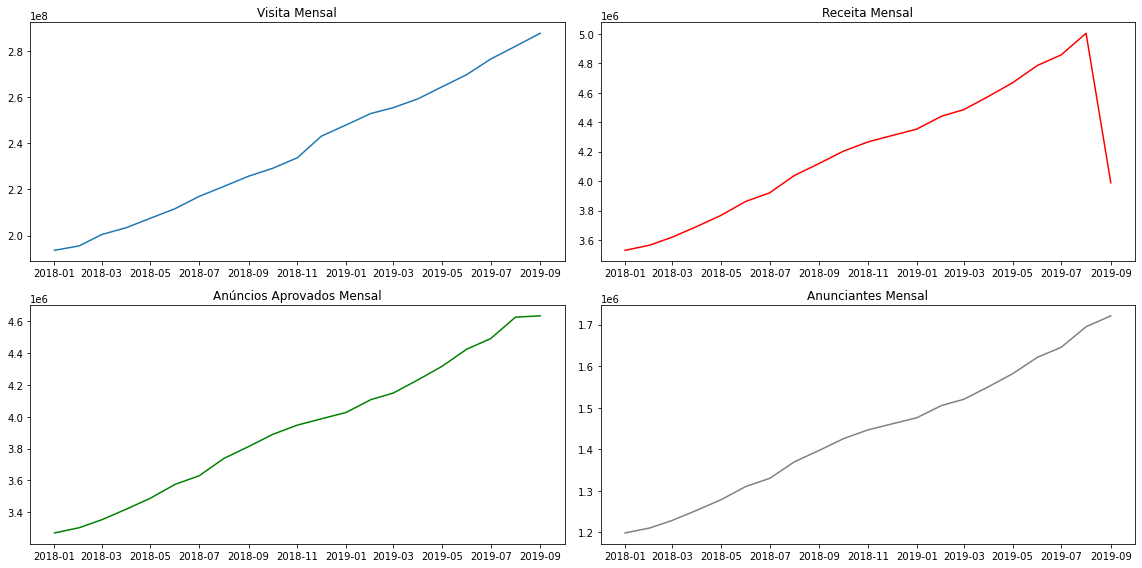

In [22]:
#Gráficos:
graf4(VisitaMensalSudeste, ReceitaMensalSudeste,  
AnunApMensalSudeste, AnunciantesMensalSudeste)

#Valores
print("Queda receita sudeste:",round((ReceitaMensalSudeste[20]/ReceitaMensalSudeste[19]-1)*100,2),"%")

No gráfico da receita mensal a região Sudeste teve uma queda significativa com 20,28% de queda em relação ao mês anterior. Enquanto isso, os gráficos de visita e anunciantes não demostram reduções. O gráfico com os anúncios aprovados não mostrou queda, mas perdeu sua inclinação ficando quase no mesmo patamar do mês anterior.

Da mesma forma que fizemos essa análise específica de região por mês, faremos das demais dimensões para procurar mais indicadores do problema. A seguir analisaremos a plataforma.

In [23]:
#Separando a base agrupando por plataforma
dsP=dataset.groupby('Plataforma')
dsP.first()

,Mes,Vertical,Regiao,Usuario,Visitantes,Anunciantes,AnunciosAp,Receita
Plataforma,,,,,,,,
App,2018-01-01,Auto,CentroOeste,private,988282,45798,54396,40847.487611
M Site,2018-01-01,Auto,CentroOeste,private,1958862,4600,5213,1226.804807
Web,2018-01-01,Auto,CentroOeste,private,1174088,9695,12162,18097.511752


<Figure size 432x288 with 0 Axes>

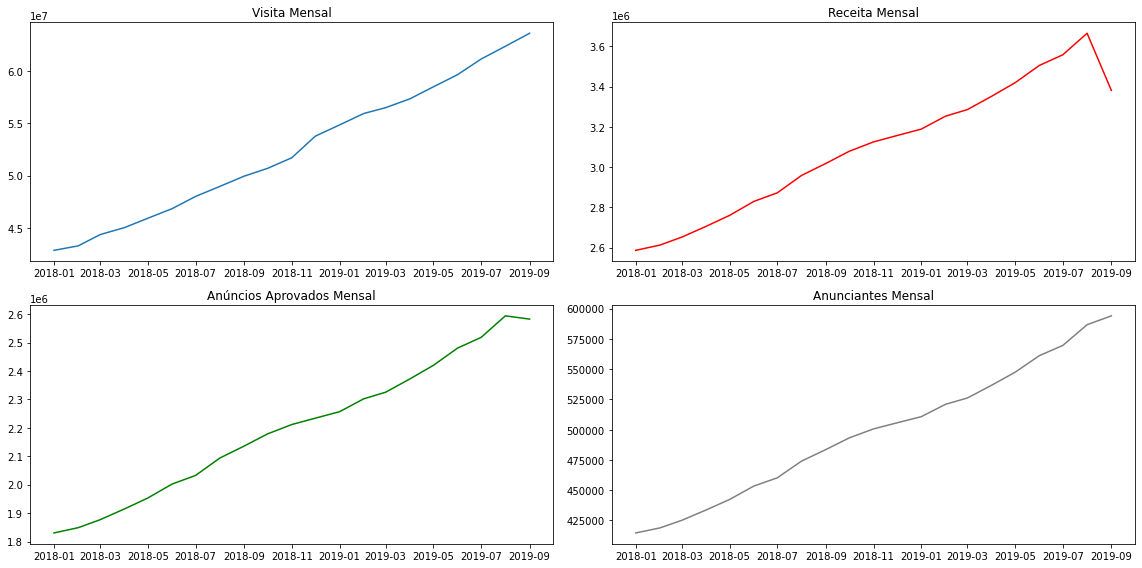

In [24]:
# Dataset apenas de Web (app e M Site não demostraram queda em anuncios aprovados, todos caem em receita)
dPlat=dsP.get_group('Web') #Alterar entre App, Web e M Site
#Analises agrupadas por mês
(VisitaMensalSudeste, ReceitaMensalSudeste,  
AnunApMensalSudeste, AnunciantesMensalSudeste)=Agrupa(dPlat,'Mes') 

#Gráficos:
graf4(VisitaMensalSudeste, ReceitaMensalSudeste,  
AnunApMensalSudeste, AnunciantesMensalSudeste)

Para não ficar cansativo, pularemos os dados das Plataformas App e M site, pois não mostraram nada muito relevante, porém é possível visualizar essas informações facilmente mexendo na entrada do ge_group de Web para a plataforma desejada.

As três plataformas tiveram quedas na receita, porém as outras duas plataformas mantinham os anúncios aprovados em alta, enquanto na Web houve uma leve queda.

A próxima dimensão é a Vertical.

In [25]:
#Separando a base agrupando por Vertical
dsV=dataset.groupby('Vertical')
dsV.first()

,Mes,Plataforma,Regiao,Usuario,Visitantes,Anunciantes,AnunciosAp,Receita
Vertical,,,,,,,,
Auto,2018-01-01,App,CentroOeste,private,988282,45798,54396,40847.487611
Marketplace,2018-01-01,App,CentroOeste,private,5815734,161561,498445,122184.903115
RealEstate,2018-01-01,App,CentroOeste,private,100655,16372,17244,87183.714412


<Figure size 432x288 with 0 Axes>

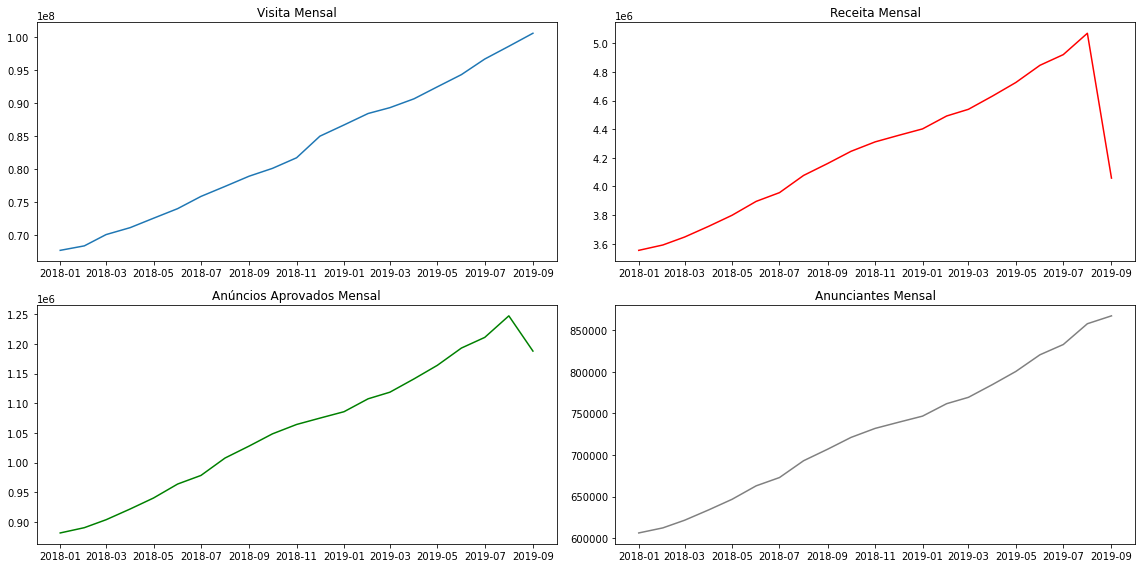

In [26]:
# Dataset apenas de Web (Marketplace e Real Estate não demostraram queda)
dVertical=dsV.get_group('Auto') #Alterar entre Auto, Marketplace e RealEstate
#Analises agrupadas por mês
(VisitaMensalV,ReceitaMensalV, 
AnunApMensalV,AnunciantesMensalV)=Agrupa(dVertical, 'Mes') 

#Gráficos:
graf4(VisitaMensalV,ReceitaMensalV, 
AnunApMensalV,AnunciantesMensalV)

Novamente disponibilizamos os gráficos da categoria com mais relevância apenas. Nela podemos ver uma queda de receita grande e uma pequena em anúncios aprovados. As outras categorias tinham todos seus gráficos crescentes.

Por último, olharemos as categorias de Usuário, professional e private.

In [27]:
dUsu=dataset.groupby('Usuario')
dUsu.first()

,Mes,Plataforma,Vertical,Regiao,Visitantes,Anunciantes,AnunciosAp,Receita
Usuario,,,,,,,,
private,2018-01-01,App,Auto,CentroOeste,988282,45798,54396,40847.487611
professional,2018-01-01,App,Auto,CentroOeste,5882,1008,5944,206369.858626



 Queda receita professional: 2.0 % 
 Queda Anúncios Aprovados professional: 2.0 % 
 Queda Anunciantes professional: 2.0 %


<Figure size 432x288 with 0 Axes>

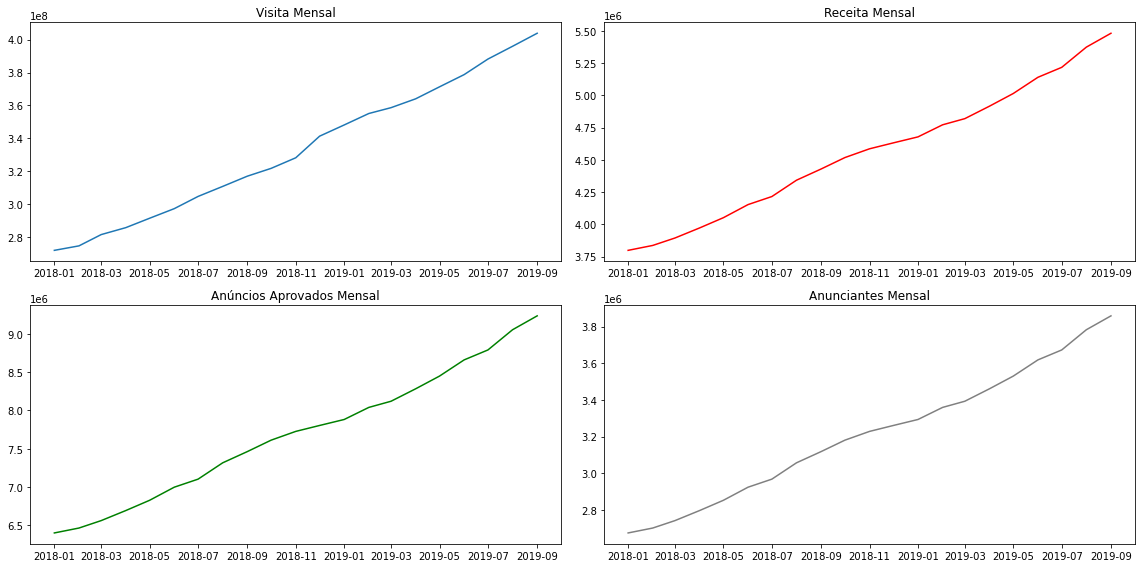

In [28]:
#Escolhendo grupo private da separação por Usuário
dPriv=dUsu.get_group('private')
#Analises agrupadas por mês
(VisitaMensalPriv,ReceitaMensalPriv,  
AnunApMensalPriv,AnunciantesMensalPriv)=Agrupa(dPriv,'Mes') 

#Gráficos:
graf4(VisitaMensalPriv,ReceitaMensalPriv,  
AnunApMensalPriv,AnunciantesMensalPriv)
print("\n Queda receita professional:",
      round(((ReceitaMensalPriv[20]/ReceitaMensalPriv[19])-1)*100,2),
      "% \n Queda Anúncios Aprovados professional:",
      round((AnunApMensalPriv[20]/AnunApMensalPriv[19]-1)*100,2),
      "% \n Queda Anunciantes professional:",
      round((AnunciantesMensalPriv[20]/AnunciantesMensalPriv[19]-1)*100,2),"%")

Todos os gráficos de usuários private continuaram crescentes não demonstrando nenhum problema em setembro, o que nos leva a crer que não são os responsáveis pela queda da receita.


 Queda receita professional: -21.33 % 
 Queda Anúncios Aprovados professional: -3.44 % 
 Queda Anunciantes professional: -10.42 %


<Figure size 432x288 with 0 Axes>

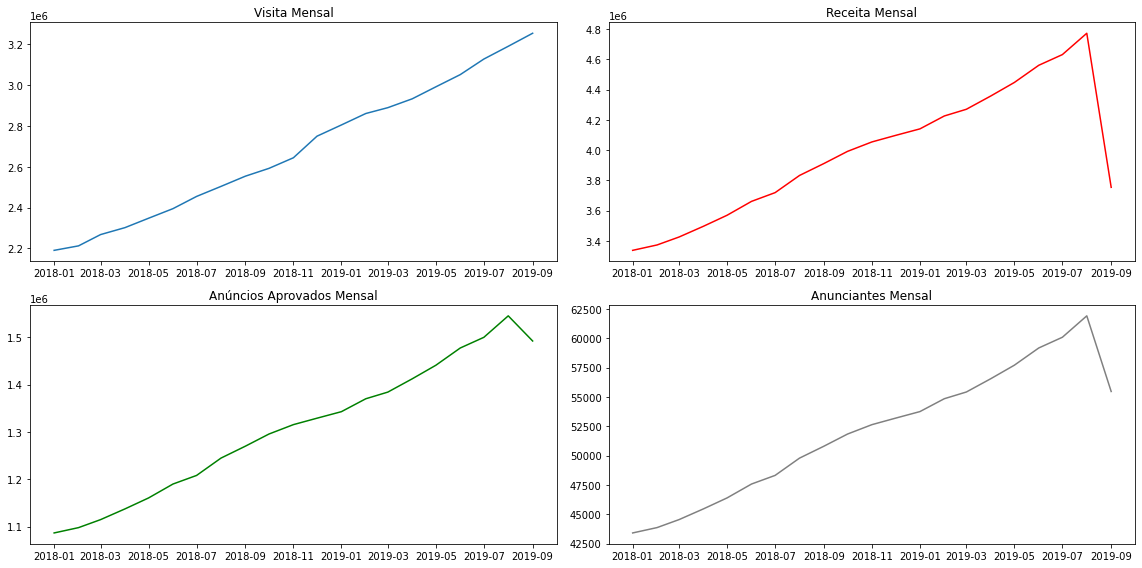

In [29]:
#Separando por Usuário e selecionando professional.
dProf=dUsu.get_group('professional')  
#Analises agrupadas por mês
(VisitaMensalProf,ReceitaMensalProf,
AnunApMensalProf,AnunciantesMensalProf)=Agrupa(dProf,'Mes')  

#Gráficos:
graf4(VisitaMensalProf,ReceitaMensalProf,
AnunApMensalProf,AnunciantesMensalProf)
#Valor
print("\n Queda receita professional:",
      round(((ReceitaMensalProf[20]/ReceitaMensalProf[19])-1)*100,2),
      "% \n Queda Anúncios Aprovados professional:",
      round((AnunApMensalProf[20]/AnunApMensalProf[19]-1)*100,2),
      "% \n Queda Anunciantes professional:",
      round((AnunciantesMensalProf[20]/AnunciantesMensalProf[19]-1)*100,2),"%")

Agora na análise dos dados estritamente professional vemos claramente as quedas. Vemos quedas de anunciantes em 10,42% comparado ao mês anterior, a queda nos anúncios aprovados foi de 3,44% e a da receita foi de 21,33%.

Lembrando que vimos logo no início das análises que professional é responsável por quase 50% da receita. Essas quedas causam grandes impactos na conta geral, sendo aproximadamente 10% da receita total.


 Receita: -50.64 %
 Anuncios Aprovados:  -53.54 %
 Anunciantes: -52.27 %


<Figure size 432x288 with 0 Axes>

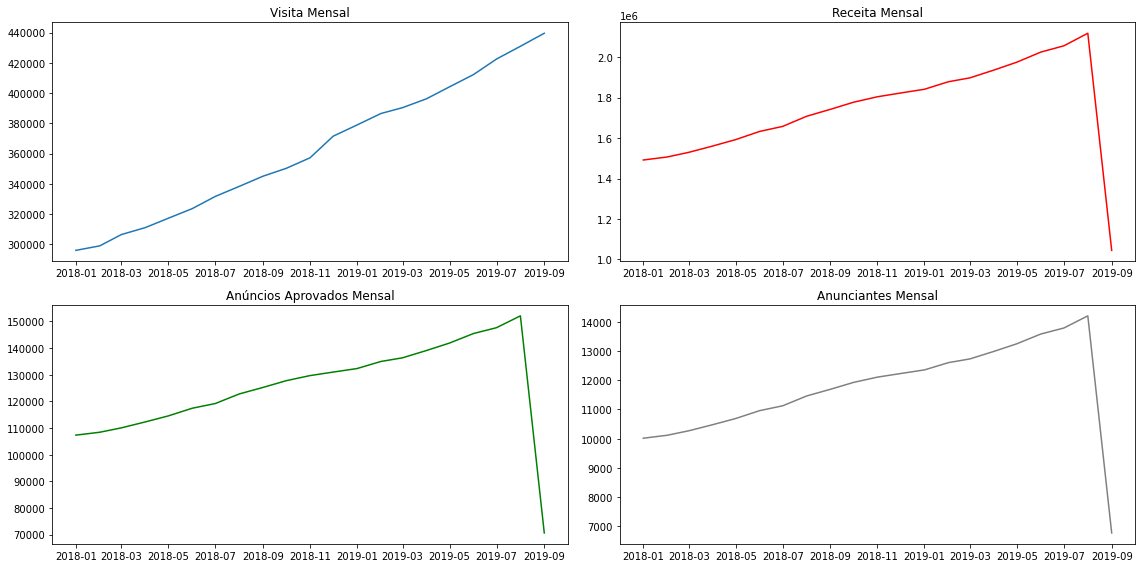

In [30]:
# Dados do Sudeste, Auto e Professional. 
dRegProf=dProf.groupby('Regiao')
dSudProf=dRegProf.get_group('Sudeste')
dVerSudProf=dSudProf.groupby('Vertical')
dAutSudProf=dVerSudProf.get_group('Auto')
#Separação por mês.
(Visita,Receita,
AnunAp,Anunciantes)=Agrupa(dAutSudProf, 'Mes') 

#Gráficos:
graf4(Visita,Receita,
AnunAp,Anunciantes)
#Valores 
print("\n Receita:", round((Receita[20]/Receita[19]-1)*100,2) ,
      "%\n Anuncios Aprovados: ", 
      round((AnunAp[20]/AnunAp[19]-1)*100,2),
      "%\n Anunciantes:",
      round((Anunciantes[20]/Anunciantes[19]-1)*100,2),"%")

Nessa última análise juntamos as 3 principais variáveis com quedas para ver o foco do problema. Os gráficos gerados com os dados dos usuários professional, da região Sudeste na vertical auto mostra quedas alarmantes, com índices de mais de 50% de perdas tanto em anúncios aprovados, como anunciantes e renda. 

Desta forma, o foco principal para se resolver esse problema é focar nesses três: professional, Sudeste e Auto, com o objetivo de voltar ao crescimento.